# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Creating My Own Multiple_Linear_Regression

In [2]:
class Multi_Variate_Linear_Regression:
    
    '''
    Step 1: Add one more column with 1 as values to the Independent variable (X)
    Step 2: Randomly choose weightage for each column in Independent Variable column
    Step 3: 
    '''
    
    def __init__(self, X, y, random_seed = 42):
        
        self.X = np.hstack((np.ones((X.shape[0], 1)), X))
        self.y = y.reshape(-1, 1)
        
        self._m_records = self.X.shape[0]
        self._n_features = self.X.shape[1]
        
        np.random.seed(random_seed)
        self._weights = np.random.randn(1, self._n_features)
        self._costs = []
        
        self._y_mean = np.mean(self.y, axis = 0)[0]
        
    def mean_absolute_error(self, y_true, y_pred):
        return np.sum(np.abs(y_true - y_pred)) / len(y_true)
    
    def fit(self, learning_rate = 0.0000001, epochs = 60000):
        for epoch in range(1 , epochs+1):
            Hypothesis = np.dot(self._weights, self.X.T)
            error = (Hypothesis - y)
            if epoch % 1000 == 0:
                cost = np.sum(error**2) / 2
                self._costs.append(cost)
                mae = self.mean_absolute_error(y, Hypothesis)
                print('Epoch {}\t: MAE_Error is {}\t| Costs\t:{}'.format(epoch, mae, cost))
                
            updater = learning_rate * error
            self._weights = self._weights - np.dot(updater, self.X)
#             print(self._weights.shape)
        
        self.intercept = self._weights[0][0]
        self.coefficient = self._weights[0][1:]
    
        return self.intercept, self.coefficient
    
    def plot_cost_function(self):
        x_axis = list(range(1, len(self._costs)+1))
        y_axis = self._costs
        
        plt.figure(figsize = (7, 10))
        plt.plot(x_axis, y_axis)
        plt.title('Cost Function Plot')
        plt.xlabel('Epochs in Thousands', fontsize = 20)
        plt.ylabel('Costs', fontsize = 20)
        plt.show()
        
    def r2_score(self):
        '''
        It’s a statistical measure between 0 and 1 which calculates 
        how similar a regression line is to the data it’s fitted to. 
        If it’s a 1, the model 100% predicts the data variance; 
        if it’s a 0, the model predicts none of the variance.
        '''
#         print(self._weights.shape, self.X.T.shape)
        _y_pred = np.dot(self._weights, self.X.T)
#         print(self.y.shape, _y_pred.shape)
#         print(_y_pred)
#         print(self.y - _y_pred.T)
        line_1_sum = np.sum((self.y - _y_pred.T) ** 2)
        line_2_sum = np.sum((self.y - self._y_mean) ** 2)
#         print(line_1_sum, line_2_sum)
        r2_score = (line_2_sum - line_1_sum) / line_2_sum
        
        print("R2 Score = {}".format(r2_score))
        return r2_score

<br><br><br><br><br><br><br><br>

# Exam Score Dataset

In [3]:
exam = pd.read_excel('mlr03.xls')
exam.head()

*** No CODEPAGE record, no encoding_override: will use 'ascii'


,EXAM1,EXAM2,EXAM3,FINAL
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142


In [22]:
X = exam.iloc[:, [0, 1, 2]].values
y = exam.iloc[:, 3].values

## Using My Own Multi Variate Linear Regression class

In [23]:
own_exam_regressor = Multi_Variate_Linear_Regression(X, y)
own_exam_regressor.fit(learning_rate = 0.000001, epochs = 40000)

Epoch 1000	: MAE_Error is 2.5170811502593637	| Costs	:112.73977493430341
Epoch 2000	: MAE_Error is 2.2505167188695467	| Costs	:95.3215714276338
Epoch 3000	: MAE_Error is 2.06170953917592	| Costs	:86.64085744999522
Epoch 4000	: MAE_Error is 1.9856821529024773	| Costs	:82.20369284936166
Epoch 5000	: MAE_Error is 1.9480736653358712	| Costs	:79.89558583614817
Epoch 6000	: MAE_Error is 1.9231449656649284	| Costs	:78.68035951367224
Epoch 7000	: MAE_Error is 1.9198821201985408	| Costs	:78.03480002895282
Epoch 8000	: MAE_Error is 1.9173767705371825	| Costs	:77.68915813480294
Epoch 9000	: MAE_Error is 1.9159170716366225	| Costs	:77.50242353813142
Epoch 10000	: MAE_Error is 1.914904959200876	| Costs	:77.40022154936494
Epoch 11000	: MAE_Error is 1.9140830493224121	| Costs	:77.34310071820265
Epoch 12000	: MAE_Error is 1.9134282711210482	| Costs	:77.3100598100133
Epoch 13000	: MAE_Error is 1.912911826112735	| Costs	:77.28989445978081
Epoch 14000	: MAE_Error is 1.9125058060831919	| Costs	:77.2766188

(0.4004348479040693, array([0.35598692, 0.52922545, 1.12335354]))

In [24]:
own_exam_regressor.intercept

0.4004348479040693

In [25]:
own_exam_regressor.coefficient

array([0.35598692, 0.52922545, 1.12335354])

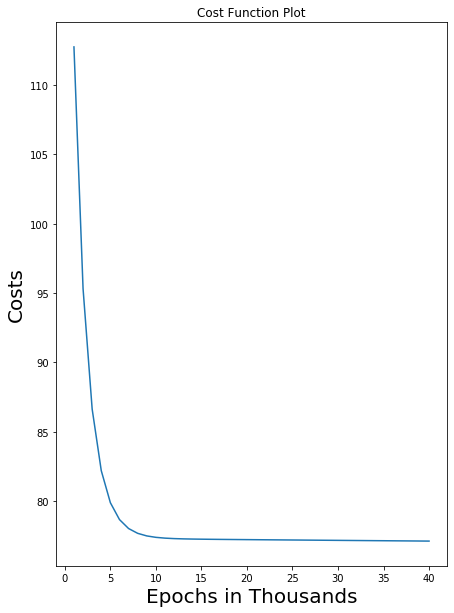

In [26]:
own_exam_regressor.plot_cost_function()

In [27]:
own_exam_regressor.r2_score()

R2 Score = 0.9888820980759466


0.9888820980759466

<br><br><br>

## Using Sklearn

In [10]:
from sklearn.linear_model import LinearRegression
skl_exam_regressor = LinearRegression()
skl_exam_regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
skl_exam_regressor.intercept_

-4.336102401240339

In [12]:
skl_exam_regressor.coef_

array([0.35593822, 0.54251876, 1.16744422])

In [13]:
from sklearn.metrics import r2_score
r2_score(y, skl_exam_regressor.predict(X))

0.9896615789448399

<br><br><br><br><br><br><br><br><br><br><br>

# Salary DataSet

In [14]:
salary = pd.read_csv('Salary_Data.csv')
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [15]:
X = salary.iloc[:, [0]].values
y = salary.iloc[:, 1].values

## Using My Own Multi Variate Linear Regression class

In [16]:
own_sal_regressor = Multi_Variate_Linear_Regression(X, y, random_seed = 100)
own_sal_regressor.fit(learning_rate = 0.0001, epochs = 30000)

Epoch 1000	: MAE_Error is 6610.519542090897	| Costs	:988663244.9528105
Epoch 2000	: MAE_Error is 5268.558579619017	| Costs	:615050605.1132333
Epoch 3000	: MAE_Error is 4739.783227845904	| Costs	:510080539.5356499
Epoch 4000	: MAE_Error is 4621.989635633313	| Costs	:480588189.726249
Epoch 5000	: MAE_Error is 4625.035985793437	| Costs	:472302030.31028557
Epoch 6000	: MAE_Error is 4634.042600595613	| Costs	:469973954.10372686
Epoch 7000	: MAE_Error is 4638.816612999429	| Costs	:469319858.6957746
Epoch 8000	: MAE_Error is 4641.347108078028	| Costs	:469136084.29805535
Epoch 9000	: MAE_Error is 4642.688412792216	| Costs	:469084451.1129784
Epoch 10000	: MAE_Error is 4643.399379729681	| Costs	:469069944.27288353
Epoch 11000	: MAE_Error is 4643.77623219342	| Costs	:469065868.4365928
Epoch 12000	: MAE_Error is 4643.975985194498	| Costs	:469064723.29117465
Epoch 13000	: MAE_Error is 4644.081865519768	| Costs	:469064401.5515525
Epoch 14000	: MAE_Error is 4644.137988047185	| Costs	:469064311.155710

(25792.20007060085, array([9449.96234046]))

In [17]:
own_sal_regressor.r2_score()

R2 Score = 0.9569566641435084


0.9569566641435084

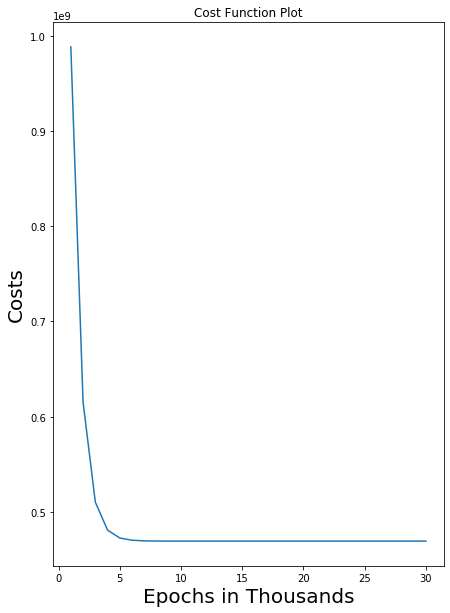

In [18]:
own_sal_regressor.plot_cost_function()

## Using Sklearn

In [19]:
from sklearn.linear_model import LinearRegression
skl_sal_regressor = LinearRegression()
skl_sal_regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
skl_sal_regressor.coef_, skl_sal_regressor.intercept_

(array([9449.96232146]), 25792.200198668717)

In [21]:
from sklearn.metrics import r2_score
r2_score(y, skl_sal_regressor.predict(X))

0.9569566641435086